Estimated Parameters:
c3: -3.33399638558867
c2: 0.21844519221858033
c1: -0.0006167834730276116
c0: 4.125599979352338


NameError: name 'F_plane' is not defined

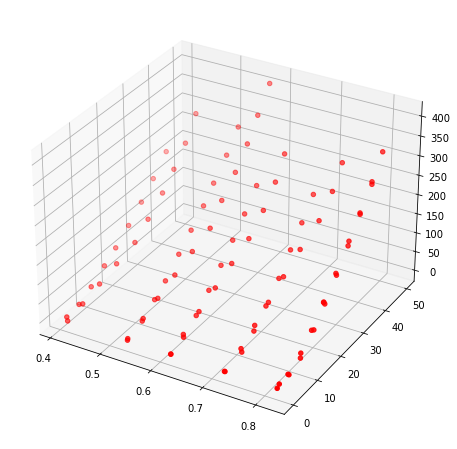

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# CSVファイルからデータを読み込む（適切なファイルパスを指定してください）
file_path = "C:\\Users\\Mizuki\\JupyterLab\\length_sensor\\data\\real_static_extracted\\20231118_2_6_se.csv"
data = pd.read_csv(file_path)

# 無限大や非数の値を取り除く
data_clean = data.replace([np.inf, -np.inf], np.nan).dropna()

# クリーニングしたデータから再度取得
L_clean = data_clean["Length"].values
P_clean = data_clean["Pressure"].values
F_clean = data_clean["Force"].values

# 関数の定義
def func(data, c3, c2, c1, c0):
    P, L = data
    K = c3 * P**2 + c2 * P * L + c1 * L**2 + c0
    return K * L  # F = K(P, L) * L

# 関数の定義
def calculate_K(P, L, c3, c2, c1, c0):
    K = c3 * P**2 + c2 * P * L + c1 * L**2 + c0
    return K 

# パラメータの初期値
initial_guess = [1.0, 1.0, 1.0, 1.0]

# 最小二乗法によるフィッティング
params, covariance = curve_fit(func, (P_clean, L_clean), F_clean, p0=initial_guess)

# 推定されたパラメータ
c3, c2, c1, c0 = params

print(f"Estimated Parameters:")
print(f"c3: {c3}")
print(f"c2: {c2}")
print(f"c1: {c1}")
print(f"c0: {c0}")



# 3D散布図
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P_clean, L_clean, F_clean, c='r', marker='o', label='Measured Force')

# フィッティングした平面
P_plane, L_plane = np.meshgrid(np.linspace(min(P_clean), max(P_clean), 100), np.linspace(min(L_clean), max(L_clean), 100))
K_plane = calculate_K(P_plane, L_plane, c3, c2, c1, c0)
ax.plot_surface(P_plane, L_plane, F_plane, color='b', alpha=0.5, label='Fitted Plane')

ax.set_xlabel('Pressure')
ax.set_ylabel('Length')
ax.set_zlabel('Force')

plt.show()

# P、L、およびK(P, L)の関係を表す平面
fig_plane = plt.figure(figsize=(10, 8))
ax_plane = fig_plane.add_subplot(111, projection='3d')

# メッシュグリッドの生成
P_plane, L_plane = np.meshgrid(np.linspace(min(P_clean), max(P_clean), 100), np.linspace(min(L_clean), max(L_clean), 100))
K_plane = calculate_K(P_plane, L_plane, c3, c2, c1, c0)

# プロット
ax_plane.plot_surface(P_plane, L_plane, K_plane, color='g', alpha=0.5, label='K(P, L) Plane')

ax_plane.set_xlabel('Pressure')
ax_plane.set_ylabel('Length')
ax_plane.set_zlabel('K(P, L)')

plt.show()
